In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds

In [2]:
## Loading User data
cols = ['user_id','movie_id','rating','timestamp']
df_user = pd.read_csv('./ml-100k/u.data',sep='	',names=cols)

In [3]:
df_user

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
#Dropping Timestamp Column
df_user = df_user.drop('timestamp',axis = 1)

In [5]:
#Checking for NULL Values
df_user.isna().sum()

user_id     0
movie_id    0
rating      0
dtype: int64

In [6]:
df_user.sample(10)

,user_id,movie_id,rating
36451,621,135,5
76573,936,50,4
86949,727,1188,2
69660,898,683,3
69811,749,642,2
906,144,742,4
83962,497,33,4
41404,75,56,5
61375,805,88,2
27321,183,176,3


In [7]:
## Loading Item data
item_columns = ['movie_id','movie_title','release_date','video_release_date',
              'IMDb_URL','unknown','Action','Adventure','Animation',
              'Children\'s','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'
]
df_item = pd.read_csv('./ml-100k/u.item',sep='|',encoding='latin-1',names= item_columns)

In [8]:
#Dropping the Unnecessary columns
df_item = df_item.drop(['release_date','video_release_date','IMDb_URL','unknown'],axis=1)

In [9]:
df_item.sample(10)

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
737,738,Threesome (1994),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
973,974,Eye for an Eye (1996),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1484,1485,"Colonel Chabert, Le (1994)",0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
156,157,Platoon (1986),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
623,624,"Three Caballeros, The (1945)",0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
111,112,Flipper (1996),0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1399,1400,Picture Bride (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
624,625,"Sword in the Stone, The (1963)",0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
640,641,Paths of Glory (1957),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
170,171,Delicatessen (1991),0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
df_main = pd.merge(df_user,df_item, on='movie_id')

In [11]:
df_main

,user_id,movie_id,rating,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,Kolya (1996),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,840,1674,4,Mamma Roma (1962),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,655,1640,3,"Eighth Day, The (1996)",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,655,1637,3,Girls Town (1996),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,655,1630,3,"Silence of the Palace, The (Saimt el Qusur) (1...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#Dataset Analysis
rating_groupby = pd.DataFrame(df_main.groupby('movie_id')['rating'].value_counts())

In [13]:
rating_groupby

rating
movie_id rating        
1        4          202
         5          119
         3           96
         2           27
         1            8
...                 ...
1678     1            1
1679     3            1
1680     2            1
1681     3            1
1682     3            1

[6714 rows x 1 columns]

In [14]:
final_ratings = pd.DataFrame(rating_groupby.groupby('movie_id')['rating'].sum())

In [15]:
final_ratings['rating'].mean()

59.45303210463734

In [16]:
final_ratings.loc[final_ratings['rating'].idxmax()]

rating    583
Name: 50, dtype: int64

In [17]:
# movie name with highest rating
df_main['movie_title'][df_main['movie_id'] == 50].head(1)

50711    Star Wars (1977)
Name: movie_title, dtype: object

In [18]:
final_ratings.loc[final_ratings['rating'].idxmin()]

rating    1
Name: 599, dtype: int64

In [19]:
df_main['movie_title'][df_main['movie_id'] == 559].head(1)

22963    Interview with the Vampire (1994)
Name: movie_title, dtype: object

In [20]:
df_pivot = df_main.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)

In [21]:
df_pivot

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
a = df_pivot.values

In [23]:
user_ratings_mean = np.mean(a, axis=1)

In [24]:
user_ratings_mean

array([0.58382878, 0.13674197, 0.08977408, 0.06183115, 0.29904875,
       0.45600476, 0.95005945, 0.13317479, 0.05588585, 0.46016647,
       0.37277051, 0.13317479, 1.17122473, 0.23840666, 0.17776457,
       0.36028537, 0.05053508, 0.6391201 , 0.04221165, 0.08858502,
       0.28418549, 0.25505351, 0.32639715, 0.17479191, 0.18787158,
       0.18727705, 0.04815696, 0.17479191, 0.07372176, 0.09631391,
       0.08382878, 0.08085612, 0.0529132 , 0.04815696, 0.04458977,
       0.0451843 , 0.12366231, 0.26753864, 0.04934602, 0.06004756,
       0.11652794, 0.40546968, 0.48751486, 0.32758621, 0.10285375,
       0.06599287, 0.05410226, 0.14863258, 0.343044  , 0.05053508,
       0.04875149, 0.14209275, 0.06361474, 0.14268728, 0.04102259,
       0.40487515, 0.22057075, 0.35136742, 0.89357907, 0.50535077,
       0.03686088, 0.45541023, 0.17241379, 0.42627824, 0.18727705,
       0.078478  , 0.06718193, 0.06123662, 0.14863258, 0.26991677,
       0.08561237, 0.31093936, 0.14625446, 0.08442331, 0.15398

In [25]:
demeaned_data = a - user_ratings_mean.reshape(-1,1)

In [26]:
demeaned_data

array([[ 4.41617122,  2.41617122,  3.41617122, ..., -0.58382878,
        -0.58382878, -0.58382878],
       [ 3.86325803, -0.13674197, -0.13674197, ..., -0.13674197,
        -0.13674197, -0.13674197],
       [-0.08977408, -0.08977408, -0.08977408, ..., -0.08977408,
        -0.08977408, -0.08977408],
       ...,
       [ 4.9470868 , -0.0529132 , -0.0529132 , ..., -0.0529132 ,
        -0.0529132 , -0.0529132 ],
       [-0.20035672, -0.20035672, -0.20035672, ..., -0.20035672,
        -0.20035672, -0.20035672],
       [-0.34066587,  4.65933413, -0.34066587, ..., -0.34066587,
        -0.34066587, -0.34066587]])

In [27]:
U, sigma, Vt = svds(demeaned_data, k = 50)

In [28]:
sigma.shape

(50,)

In [29]:
sigma = np.diag(sigma)

In [30]:
sigma.shape

(50, 50)

In [31]:
U.shape

(943, 50)

In [32]:
Vt.shape

(50, 1682)

In [33]:
predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(predicted_ratings, columns = df_pivot.columns)

In [34]:
from sklearn.metrics import mean_absolute_error as MAE,mean_squared_error as MSE,classification_report

In [35]:
# Mean Absolute Error
mae = MAE(a,predicted_ratings)
print("Mean Absolute Error is", mae)

Mean Absolute Error is 0.27156342160997593


In [36]:
# Root Mean Sqaured Error.
mse = MSE(a,predicted_ratings)
print("Root Mean Sqaured Error is", np.sqrt(mse))

Root Mean Sqaured Error is 0.5796462668260163


In [37]:
print(classification_report(a.astype(np.int32)[2],predicted_ratings.astype(np.int32)[2]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1628
           1       0.07      0.38      0.12         8
           2       0.45      0.31      0.37        16
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00         6

    accuracy                           0.96      1682
   macro avg       0.25      0.28      0.25      1682
weighted avg       0.96      0.96      0.96      1682



C:\Users\aakas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aakas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aakas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [38]:
preds_df

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
0,6.488436,2.959503,1.634987,3.024467,1.656526,1.659506,3.630469,0.240669,1.791518,3.347816,...,0.011976,-0.092017,-0.074553,-0.060985,0.009427,-0.035641,-0.039227,-0.037434,-0.025552,0.023513
1,2.347262,0.129689,-0.098917,0.328828,0.159517,0.481361,0.213002,0.097908,1.892100,0.671000,...,0.003943,-0.026939,-0.035460,-0.029883,-0.027153,-0.015244,-0.008277,-0.011760,0.011639,-0.046924
2,0.291905,-0.263830,-0.151454,-0.179289,0.013462,-0.088309,-0.057624,0.568764,-0.018506,0.280742,...,-0.028964,-0.031622,0.045513,0.026089,-0.021705,0.002282,0.032363,0.017322,-0.006644,-0.009480
3,0.366410,-0.443535,0.041151,-0.007616,0.055373,-0.080352,0.299015,-0.010882,-0.160888,-0.118834,...,0.020069,0.015981,-0.000182,0.005593,0.026634,0.023562,0.036405,0.029984,0.015612,-0.008713
4,4.263488,1.937122,0.052529,1.049350,0.652765,0.002836,1.730461,0.870584,0.341027,0.569055,...,0.019973,-0.053521,-0.017242,-0.007137,-0.038987,0.010338,0.004869,0.007603,-0.020575,0.003330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.601615,-0.110491,-0.198045,-0.229476,0.345397,0.152378,-0.133373,1.073894,2.993480,-0.240829,...,0.033564,0.014452,0.067121,0.050841,0.058726,0.014191,0.006006,0.010099,0.053688,-0.014125
939,0.585532,-0.355471,-0.186924,2.170066,0.457680,0.013850,3.113494,2.612028,2.554361,-0.451883,...,-0.016607,0.003067,-0.021431,-0.022870,-0.006169,-0.019979,-0.008443,-0.014211,-0.043621,-0.078814
940,3.118558,-0.041062,0.546047,-0.060874,-0.169393,0.015739,2.338824,0.417505,0.679524,-0.015267,...,-0.009333,-0.006661,-0.040438,-0.024605,0.002486,0.006109,0.004205,0.005157,0.002902,-0.006074
941,0.943730,0.599492,0.486034,-0.363920,0.465666,0.173843,-0.276099,1.390914,-0.509617,-0.751110,...,0.010092,0.028925,0.033764,0.021061,-0.017479,0.001330,0.012677,0.007003,0.016461,0.000274


In [39]:
def recommend_movies(predictions_df, userID, movies_df, original_ratings_df, num_recommendations=5):
    
    # Get and sort the user's predictions
    sorted_user_predictions = predictions_df.iloc[userID].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings_df[original_ratings_df.user_id == (userID)]
    #print(user_data)
    user_item_pair = (user_data.merge(movies_df, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )
    #print(user_item_pair)

    print('User {0} has already rated {1} movies.'.format(userID, user_item_pair.shape[0]))
    
    # dataframe consisting the movies which are not rated by user.
    movies_notyet_rated = movies_df[~movies_df['movie_id'].isin(user_item_pair['movie_id'])]
    
    # Getting the closest movies based on user rated movies and predictions.
    recommendations = movies_notyet_rated.merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
                                                left_on = 'movie_id',right_on = 'movie_id')
    recommendations = recommendations.rename(columns = {userID: 'Predictions'})
    recommendations = recommendations.sort_values('Predictions', ascending = False).iloc[:num_recommendations, :-1]
                

    return user_item_pair, recommendations

In [40]:
already_rated, predictions = recommend_movies(preds_df, 56, df_item, df_user, 10)

User 56 has already rated 187 movies.


In [41]:
already_rated

,user_id,movie_id,rating,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
93,56,402,5,Ghost (1990),0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
175,56,193,5,"Right Stuff, The (1983)",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,56,174,5,Raiders of the Lost Ark (1981),1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,56,238,5,Raising Arizona (1987),0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
101,56,183,5,Alien (1979),1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,56,849,2,Days of Thunder (1990),1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
113,56,88,1,Sleepless in Seattle (1993),0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
145,56,233,1,Under Siege (1992),1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,56,235,1,Mars Attacks! (1996),1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
predictions

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
162,257,Men in Black (1997),1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
189,288,Scream (1996),0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
11,15,Mr. Holland's Opus (1995),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
183,282,"Time to Kill, A (1996)",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
79,125,Phenomenon (1996),0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
674,845,That Thing You Do! (1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,8,Babe (1995),0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
60,100,Fargo (1996),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
215,318,Schindler's List (1993),0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
599,763,Happy Gilmore (1996),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
predictions['movie_title']

162          Men in Black (1997)
189                Scream (1996)
11     Mr. Holland's Opus (1995)
183       Time to Kill, A (1996)
79             Phenomenon (1996)
674    That Thing You Do! (1996)
5                    Babe (1995)
60                  Fargo (1996)
215      Schindler's List (1993)
599         Happy Gilmore (1996)
Name: movie_title, dtype: object

In [44]:
rmse = []
for k in [20,30,40,50]:
    U, sigma, Vt = svds(demeaned_data, k)
    sigma = np.diag(sigma)
    predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
    preds_df = pd.DataFrame(predicted_ratings, columns = df_pivot.columns)
    # Root Mean Sqaured Error.
    mse = MSE(a,predicted_ratings)
    rmse.append(mse)
    print("Root Mean Sqaured Error for {} features is{}".format(k,np.sqrt(mse)))

Root Mean Sqaured Error for 20 features is0.6448346789594118
Root Mean Sqaured Error for 30 features is0.620484546802225
Root Mean Sqaured Error for 40 features is0.5992076028777388
Root Mean Sqaured Error for 50 features is0.5796462668260163


In [45]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'RMSE value at different feature space')

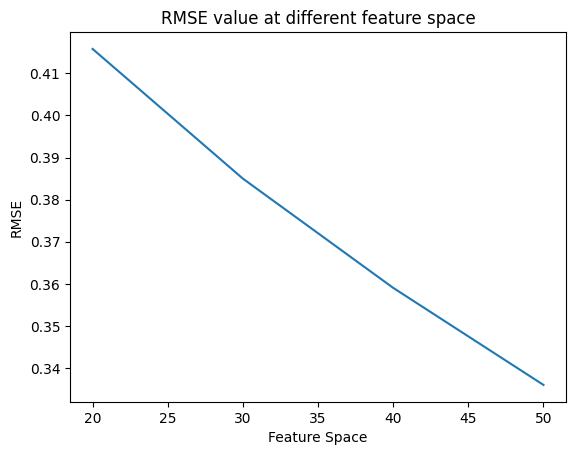

In [46]:
plt.plot([20,30,40,50],rmse)
plt.xlabel("Feature Space")
plt.ylabel('RMSE')
plt.title('RMSE value at different feature space')